# ✈️ AIR TRAFFIC ANALYSIS 📊

In [10]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv("../DataSets/air_traffic_data.csv")
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


### // Data Preparation
#### 🎯 How can we handle missing values and anomalies in the dataset?

In [13]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    54
Published Airline               0
Published Airline IATA Code    54
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Adjusted Activity Type Code     0
Adjusted Passenger Count        0
Year                            0
Month                           0
dtype: int64

##### Searched for the columns containing null values 

In [15]:
df['Operating Airline IATA Code'].fillna("unknown",inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4172\820206722.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Operating Airline IATA Code'].fillna("unknown",inplace=True)


In [16]:
df['Published Airline IATA Code'].fillna("unknown",inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4172\2446301192.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Published Airline IATA Code'].fillna("unknown",inplace=True)


##### Replaced NaN to reduce upcoming errors 

#### 🎯What transformations are required to convert the Activity Period column into a more usable format?

In [19]:
df['Activity Period']=pd.to_datetime(df['Activity Period'],format='%Y%m')

##### Activity period column was in integer datatype ,it must be in date format as it is describing the period of activity 

### //Exploratory Data Analysis (EDA)

#### 🎯What are the key statistics for passenger counts, and how are they distributed?

In [23]:
df.describe()

,Activity Period,Passenger Count,Adjusted Passenger Count,Year
count,15007,15007.000000,15007.000000,15007.000000
mean,2010-11-05 19:37:51.020190464,29240.521090,29331.917105,2010.385220
min,2005-07-01 00:00:00,1.000000,1.000000,2005.000000
25%,2008-03-01 00:00:00,5373.500000,5495.500000,2008.000000
50%,2010-11-01 00:00:00,9210.000000,9354.000000,2010.000000
75%,2013-08-01 00:00:00,21158.500000,21182.000000,2013.000000
max,2016-03-01 00:00:00,659837.000000,659837.000000,2016.000000
std,NaN,58319.509284,58284.182219,3.137589


##### It gives a quick statistical summary
Data Range for passenger traffic is the vast range from 2005 to 2016, 
Missing Values Check : no null  

#### 🎯 Which regions have the highest and lowest passenger traffic?

In [26]:
df.groupby('GEO Region')['Passenger Count'].sum().nlargest()

GEO Region
US        338141001
Asia       43972770
Europe     26646558
Canada     13865159
Mexico      7998587
Name: Passenger Count, dtype: int64

In [27]:
df.groupby('GEO Region')['Passenger Count'].sum().nsmallest()

GEO Region
South America           250741
Central America        1355400
Middle East            1852943
Australia / Oceania    4729341
Mexico                 7998587
Name: Passenger Count, dtype: int64

##### Highest Passenger traffic as per the GEO regions is in US 
##### Lowest Passenger traffic as per the GEO Region is in South America 

#### 🎯How do the different activity types (Deplaned, Enplaned, etc.) contribute to passenger counts?

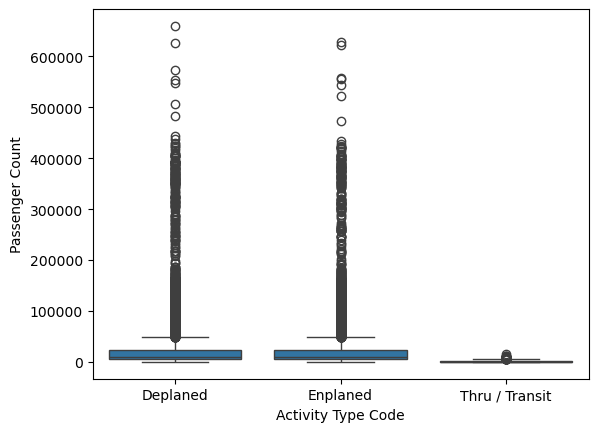

In [30]:
sb.boxplot(x=df['Activity Type Code'],y=df['Passenger Count'])
plt.show()

##### Most passengers are either Enplaned or Deplaned, with high variability and many outliers.
##### Thru / Transit has consistently low passenger counts with minimal variation.

### //Temporal Analysis

#### 🎯How has passenger traffic evolved over the years and months?

In [34]:
pi=pd.pivot_table(data=df,index="Year",columns="Month",values="Passenger Count",aggfunc='sum')
pi

Month,April,August,December,February,January,July,June,March,May,November,October,September
Year,,,,,,,,,,,,
2005,NaN,3195866.0,2671797.0,NaN,NaN,3225769.0,NaN,NaN,NaN,2617333.0,2770715.0,2740553.0
2006,2773293.0,3143839.0,2698200.0,2223024.0,2448889.0,3227605.0,3071396.0,2708778.0,2829000.0,2653887.0,2834959.0,2720100.0
2007,2869247.0,3436417.0,2903637.0,2304990.0,2507430.0,3382382.0,3263621.0,2820085.0,3056934.0,2922500.0,3129309.0,2957530.0
2008,3029021.0,3612297.0,2962937.0,2595676.0,2670053.0,3603946.0,3453751.0,3127387.0,3305954.0,2744485.0,3124451.0,3004720.0
2009,3024973.0,3650668.0,3074209.0,2359800.0,2644539.0,3649702.0,3419595.0,2925918.0,3177100.0,2971484.0,3249428.0,3191526.0
2010,3139059.0,3771842.0,3167124.0,2515361.0,2785466.0,3765824.0,3612886.0,3105958.0,3380355.0,3163659.0,3490100.0,3356365.0
2011,3200527.0,3917884.0,3441693.0,2610667.0,2883810.0,3935589.0,3766323.0,3129205.0,3547804.0,3326859.0,3602455.0,3564970.0
2012,3563007.0,4356216.0,3443039.0,2998119.0,3211600.0,4284443.0,4107195.0,3472440.0,3820570.0,3478890.0,3844987.0,3819379.0
2013,3604104.0,4347059.0,3814984.0,2966477.0,3204637.0,4176486.0,4146797.0,3593364.0,3933016.0,3466878.0,3910790.0,3781168.0


##### Passenger counts show a steady annual increase from 2005 to 2015 across most months.
##### July to October consistently report higher traffic, peaking in 2015.
##### Missing values appear mainly in early years and 2016, possibly due to incomplete data collection.

#### 🎯 Are there specific months or seasons that show peak or low passenger traffic?

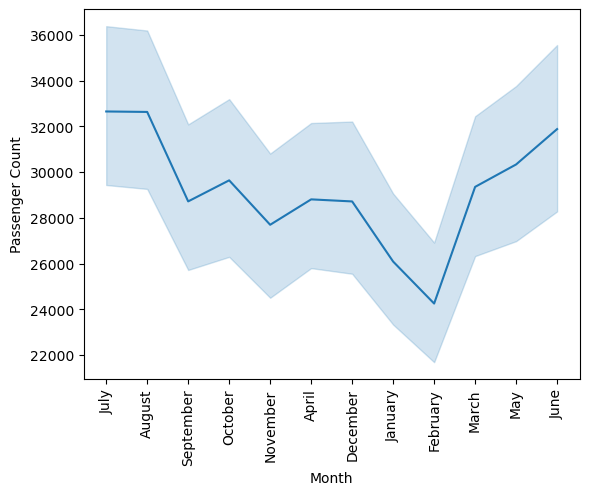

In [37]:
sb.lineplot(x=df.Month,y=df['Passenger Count'])
plt.xticks(rotation=90)
plt.show()
            

##### Passenger counts drop sharply in January and February, then rise steadily till June, peaking again in July-August.

#### 🎯 What trends can be identified from year-over-year passenger data?

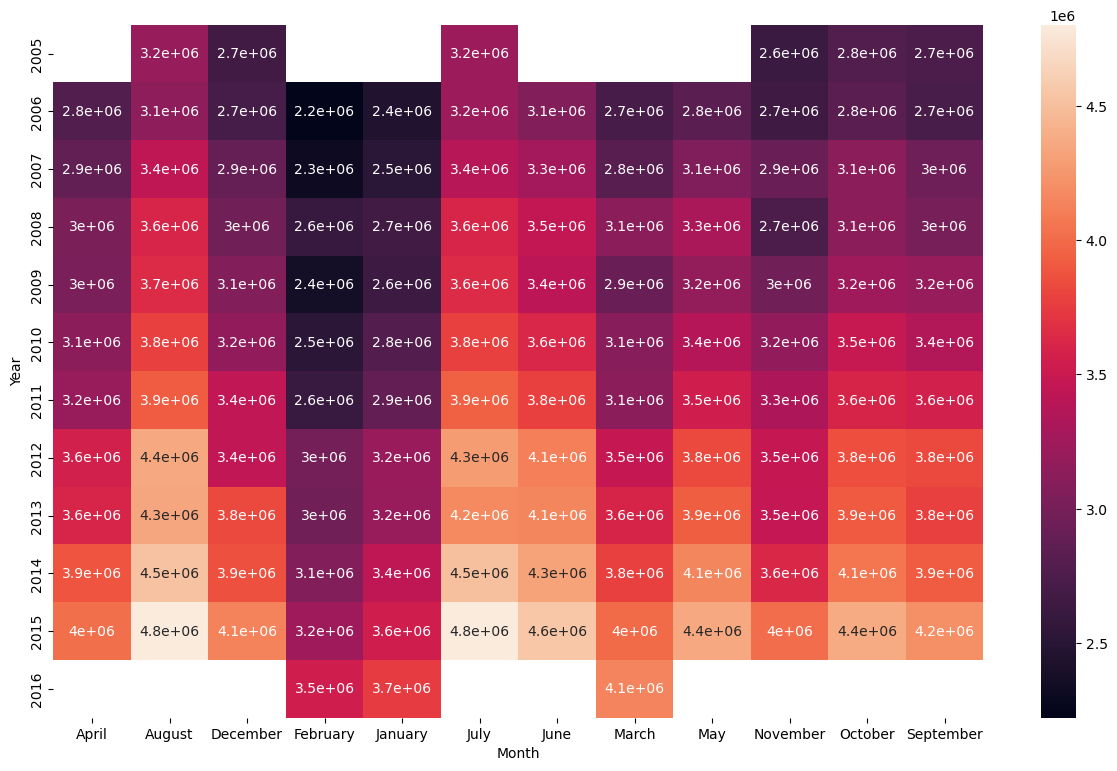

In [40]:
plt.figure(figsize=(15,9))
sb.heatmap(pi,annot=True)
plt.show()

##### Summer months (June–August) consistently show higher traffic, indicated by warmer colors.
##### Data gaps exist in early years (2005), but overall, there's a clear upward trend across all months.

### // Airline Analysis

#### 🎯 Which airlines handle the highest and lowest number of passengers?

In [44]:
df.groupby('Operating Airline',)['Passenger Count'].sum().nsmallest()

Operating Airline
Evergreen International Airlines      4
Boeing Company                       18
Atlas Air, Inc                       68
Ameriflight                         110
Xtra Airways                        146
Name: Passenger Count, dtype: int64

In [45]:
df.groupby('Operating Airline')['Passenger Count'].sum().nlargest()

Operating Airline
United Airlines - Pre 07/01/2013    105363917
United Airlines                      64876996
SkyWest Airlines                     35711737
American Airlines                    34588714
Virgin America                       26934738
Name: Passenger Count, dtype: int64

##### "United Airlines" has the highest number of Passenger count on the other hand "Evergreen International Airlines" with only 4 passengers 

### 🎯How is passenger traffic distributed among different airlines?

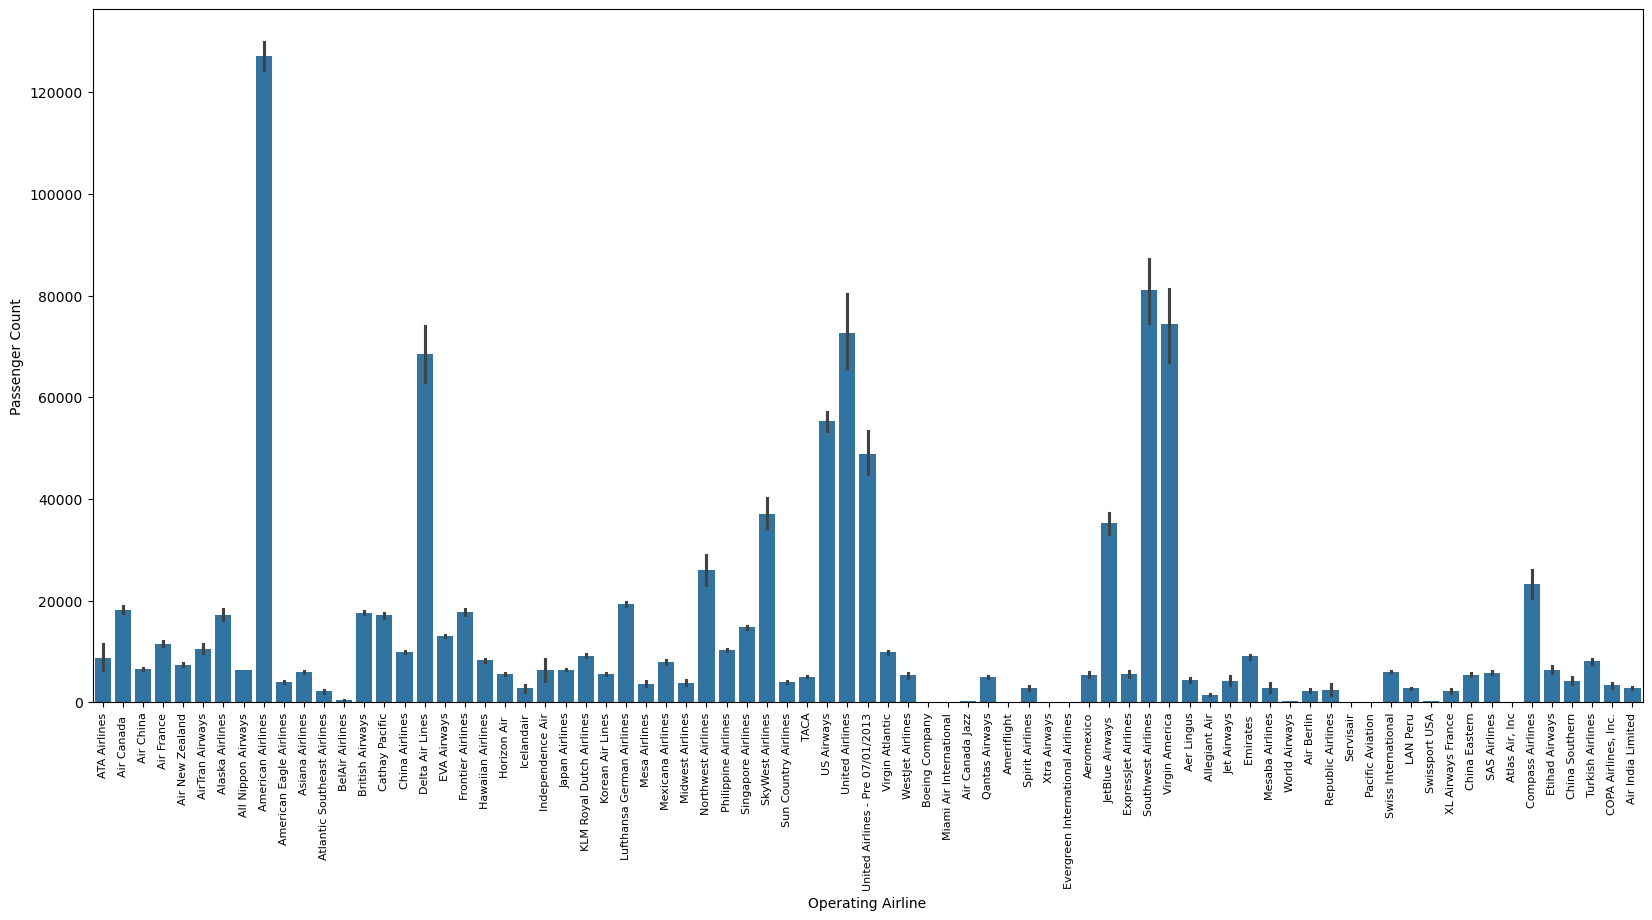

In [48]:
plt.figure(figsize=(20,9))
sb.barplot(x=df['Operating Airline'],y=df['Passenger Count'])
plt.xticks(rotation=90, ha='center', fontsize=8)
plt.show()

### //Terminal and Boarding Area Analysis:

#### 🎯Which terminals and boarding areas are the busiest in terms of passenger traffic?

In [77]:
d=df.groupby(['Boarding Area','Terminal'])['Passenger Count'].sum().nlargest().reset_index()

##### Terminal 3 with boarding area F and terminal 1 with B boarding area have the busiest passeneger traffic followed by the others

#### 🎯 Is there a notable difference in usage between terminals or boarding 

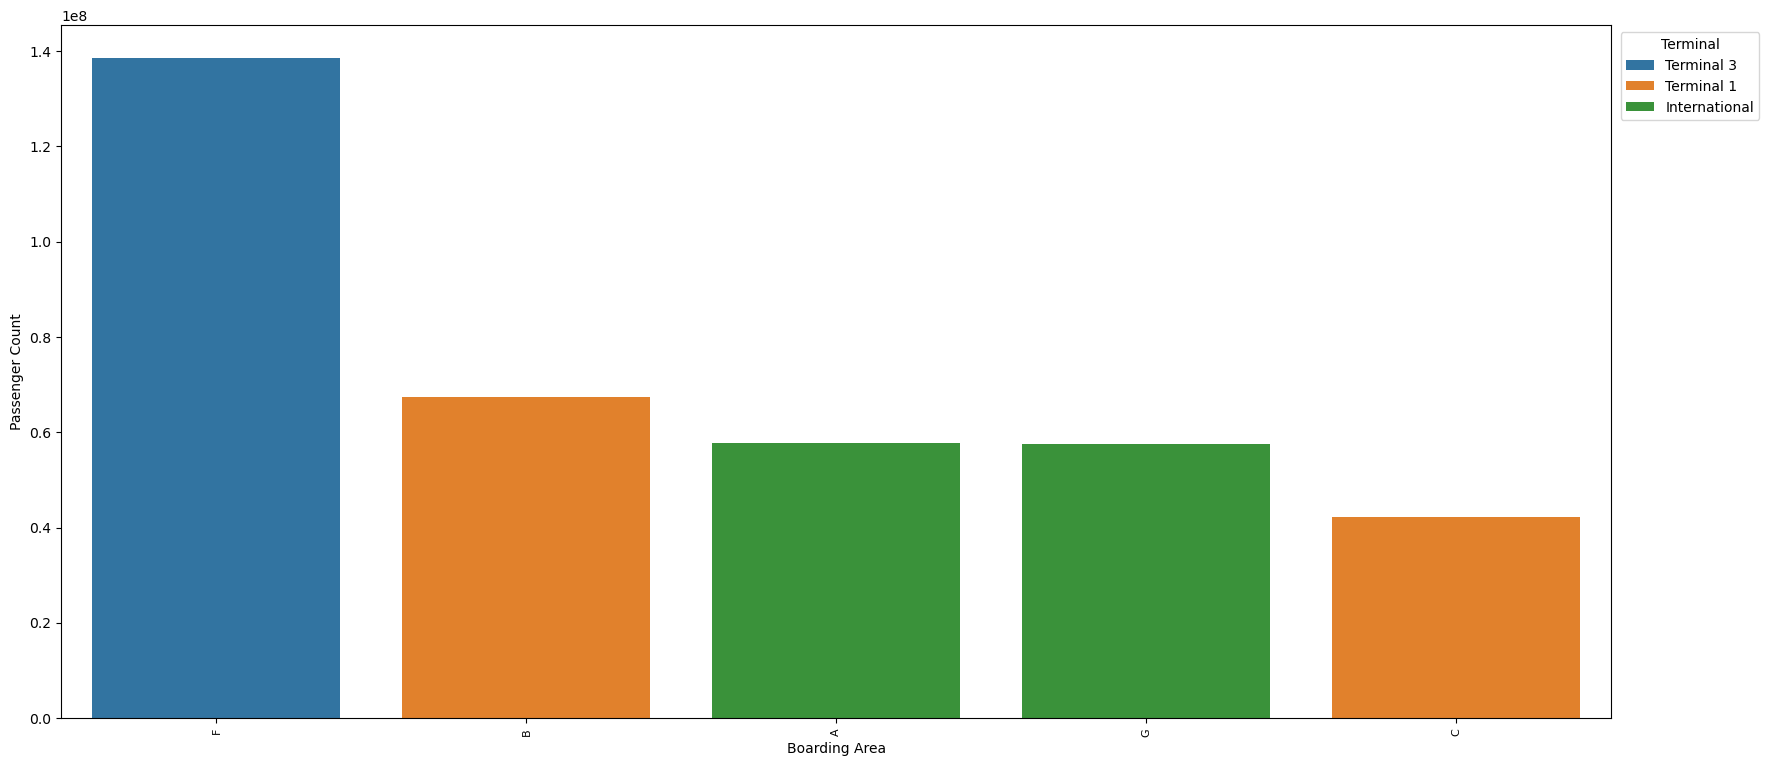

In [87]:
plt.figure(figsize=(20,9))
sb.barplot(x=d['Boarding Area'],y=d['Passenger Count'],hue=d['Terminal'])
plt.xticks(rotation=90, ha='center', fontsize=8)
plt.legend(title='Terminal',bbox_to_anchor=(1.10,1))
plt.show()

##### Most traffic flows through Terminal 3 and Terminal 2.
Boarding Areas F, E, and D are the busiest overall.
The International terminal serves fewer passengers, suggesting fewer international flights or smaller aircraft.